In [1]:
!pip install mne

     |████████████████████████████████| 7.0MB 6.8MB/s 


In [2]:
import mne
import matplotlib.pyplot as plt
import os
import numpy as np

In [4]:
OpenMIIR_data_path = '/content/drive/MyDrive/Brain-Computer Interfaces/OpenMIIR Data/'
file_name = 'P05-raw.fif'
raw = mne.io.read_raw_fif(OpenMIIR_data_path + file_name)
print(type(raw), len(raw))

Opening raw data file /content/drive/MyDrive/Brain-Computer Interfaces/OpenMIIR Data/P05-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2521101 =      0.000 ...  4924.025 secs
Ready.
<class 'mne.io.fiff.raw.Raw'> 2521102


In [5]:
print(raw)
print(raw.info)

<Raw | P05-raw.fif, 69 x 2521102 (4924.0 s), ~78 kB, data not loaded>
<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 1 STIM
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2015-02-02 17:06:12 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: Average EEG reference: off
 sfreq: 512.0 Hz
>


Effective window size : 4.000 (s)


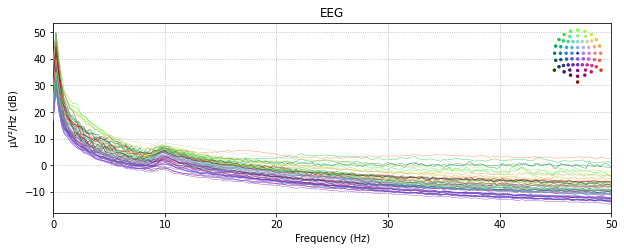

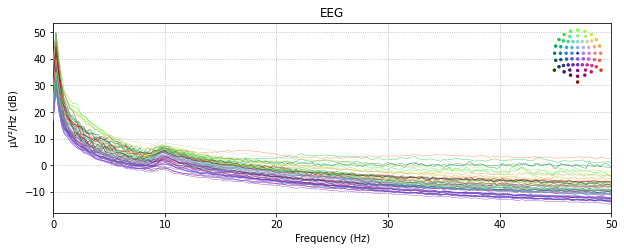

In [6]:
raw.plot_psd(fmax=50)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


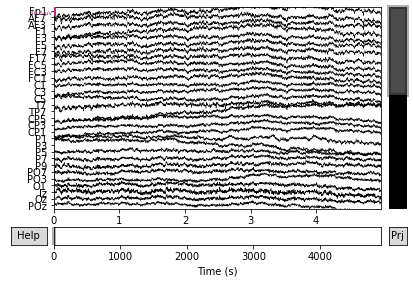

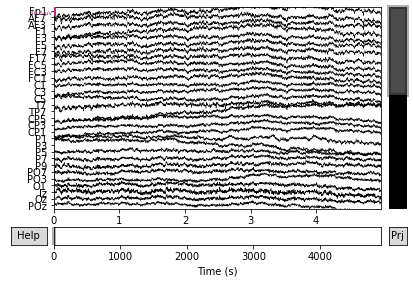

In [ ]:
raw.plot(duration=5, n_channels=30)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


<ipython-input-12-ee1a249b7462>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 83.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
2462 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
2462 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


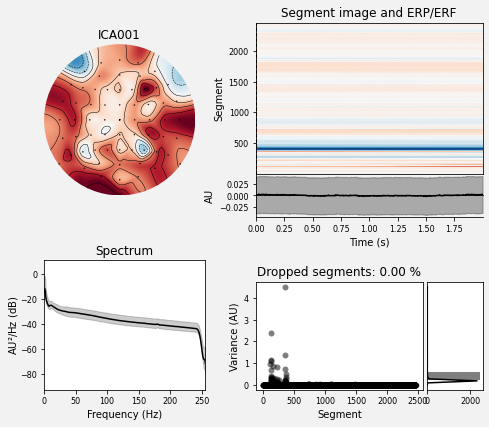

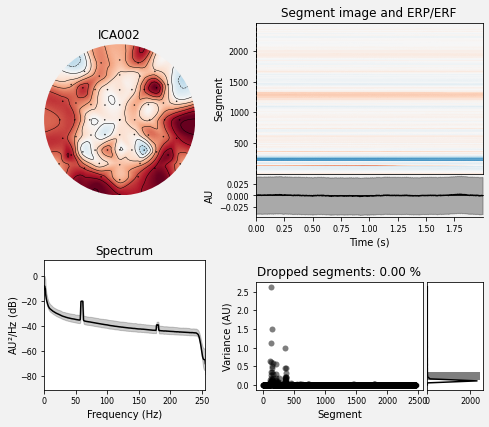

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]
ica.plot_properties(raw, picks=ica.exclude)

In [ ]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

Reading 0 ... 2521101  =      0.000 ...  4924.025 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components


<Raw | P05-raw.fif, 69 x 2521102 (4924.0 s), ~1.30 GB, data loaded>

In [ ]:
chs = raw.info['ch_names']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


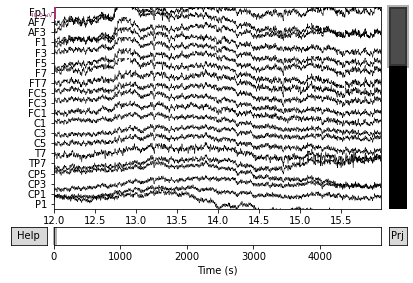

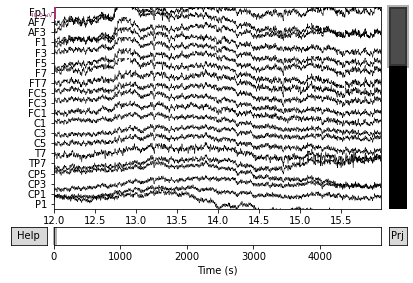

In [ ]:
orig_raw.plot(order=chan_idxs, start=12, duration=4)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


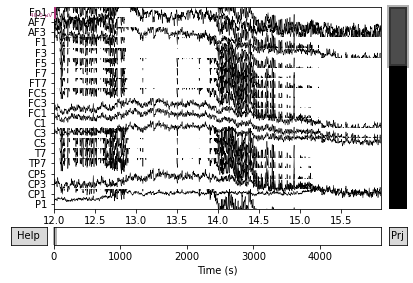

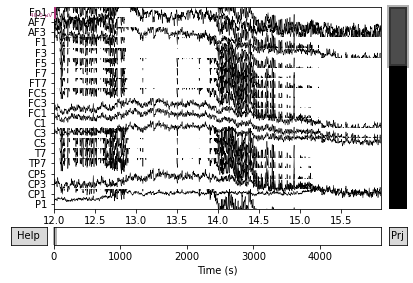

In [ ]:
raw.plot(order=chan_idxs, start=12, duration=4)

In [ ]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # show the first 5
print('# of event ids:', len(set(events[:, 2])))

540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2000 2001]
[[  512     0   121]
 [  520     0  1000]
 [ 8189     0   122]
 [ 8195     0  1000]
 [16564     0   123]]
# of event ids: 52


Removing projector <Projection | Average EEG reference, active : False, n_channels : 64>


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


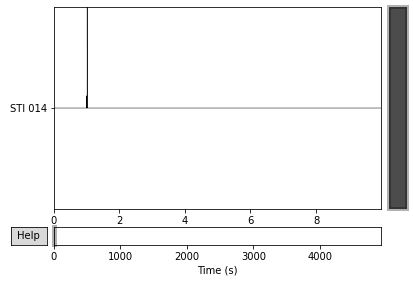

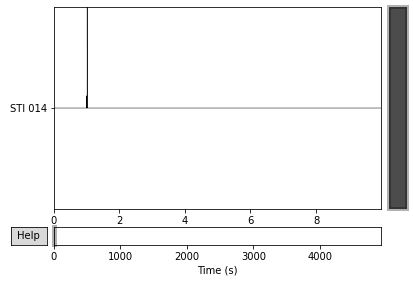

In [ ]:
raw.copy().pick_types(stim=True).plot()

In [ ]:
event_dict = {}
for each in list(set(events[:, 2])):
    event_dict['event_id/' + str(each)] = each
print(event_dict)

{'event_id/131': 131, 'event_id/132': 132, 'event_id/133': 133, 'event_id/134': 134, 'event_id/11': 11, 'event_id/12': 12, 'event_id/141': 141, 'event_id/142': 142, 'event_id/143': 143, 'event_id/13': 13, 'event_id/144': 144, 'event_id/14': 14, 'event_id/21': 21, 'event_id/22': 22, 'event_id/23': 23, 'event_id/24': 24, 'event_id/31': 31, 'event_id/32': 32, 'event_id/33': 33, 'event_id/34': 34, 'event_id/41': 41, 'event_id/42': 42, 'event_id/43': 43, 'event_id/44': 44, 'event_id/2000': 2000, 'event_id/2001': 2001, 'event_id/211': 211, 'event_id/212': 212, 'event_id/213': 213, 'event_id/214': 214, 'event_id/1111': 1111, 'event_id/221': 221, 'event_id/222': 222, 'event_id/223': 223, 'event_id/224': 224, 'event_id/231': 231, 'event_id/1000': 1000, 'event_id/232': 232, 'event_id/233': 233, 'event_id/234': 234, 'event_id/111': 111, 'event_id/112': 112, 'event_id/113': 113, 'event_id/241': 241, 'event_id/242': 242, 'event_id/243': 243, 'event_id/244': 244, 'event_id/114': 114, 'event_id/121':

<ipython-input-37-fc167fa6cf03>:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)


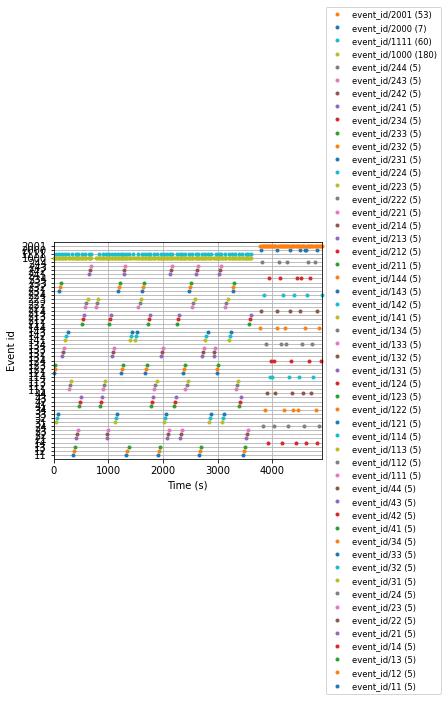

In [ ]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

In [ ]:
# reject_criteria = dict(eeg=150e-6,       # 150 µV
#                        eog=250e-6)       # 250 µV
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5, preload=True)

Not setting metadata
Not setting metadata
540 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
1 projection items activated
Loading data for 540 events and 359 original time points ...
0 bad epochs dropped


Not setting metadata
Not setting metadata
540 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
540 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


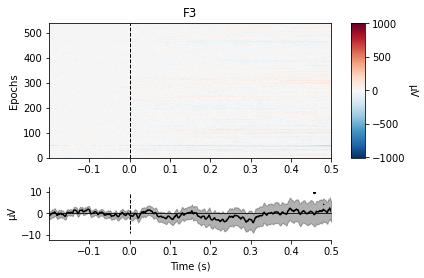

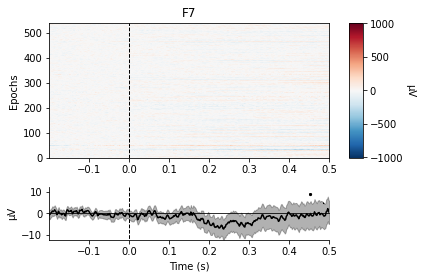

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [ ]:
epochs.plot_image(picks=['F3', 'F7'])

In [ ]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(epochs, n_cycles=2, return_itc=False, freqs=frequencies, decim=3)

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>
No baseline correction applied


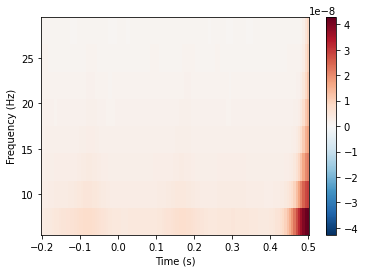

[<Figure size 432x288 with 2 Axes>]

In [ ]:
power.plot(['F3'])

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>
combining channels using "gfp"


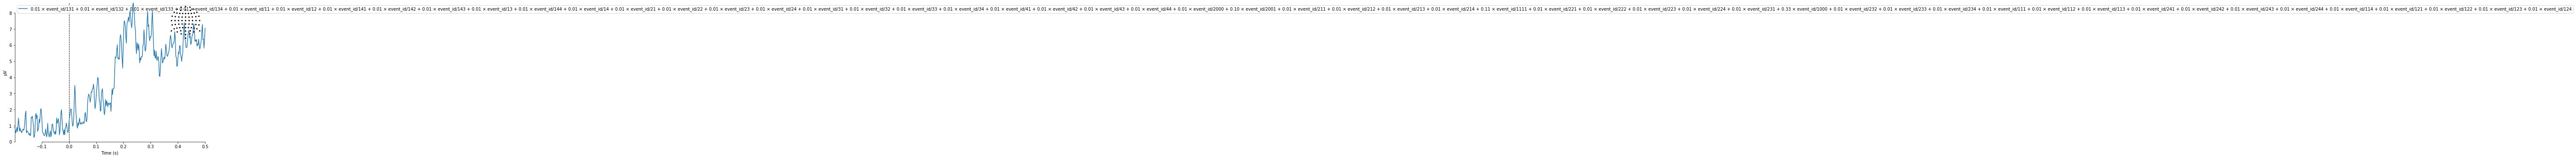

[<Figure size 576x432 with 2 Axes>]

In [ ]:
evoked = epochs.average()
mne.viz.plot_compare_evokeds(evoked, legend='upper left', show_sensors='upper right')

No projector specified for this dataset. Please consider the method self.add_proj.


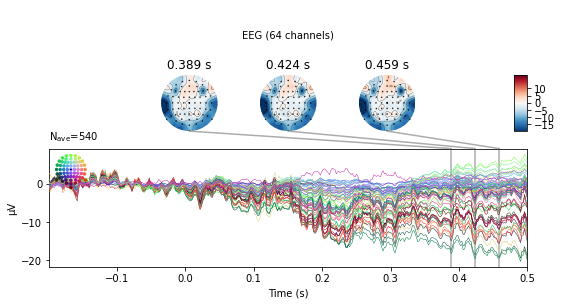

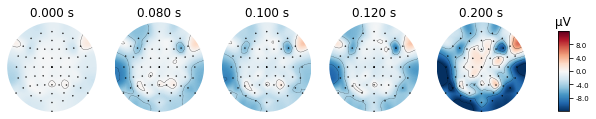

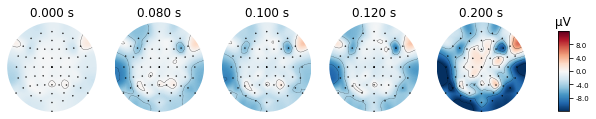

In [ ]:
evoked.plot_joint(picks='eeg')
evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

In [ ]:
from mne.minimum_norm import make_inverse_operator, apply_inverse

Computing rank from data with rank=None
    Using tolerance 6e-10 (2.2e-16 eps * 64 dim * 4.2e+04  max singular value)
    Estimated rank (eeg): 62
    EEG: rank 62 computed from 64 data channels with 0 projectors
    Setting small EEG eigenvalues to zero (without PCA)
Reducing data rank from 64 -> 62
Estimating covariance using SHRUNK
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
Number of samples used : 55620
log-likelihood on unseen data (descending order):
   shrunk: -177.629
   empirical: -177.684
selecting best estimator: shrunk
[done]
Computing rank from covariance with rank=None
    Using tolerance 4.5e-12 (2.2e-16 eps * 64 dim * 3.2e+02  max singular value)
    Estimated rank (eeg): 62
    EEG: rank 62 computed from 64 data channels with 0 projectors


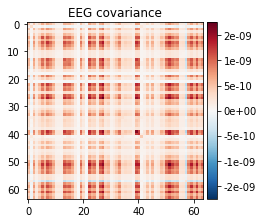

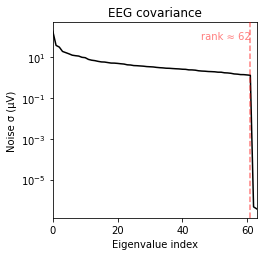

In [ ]:
noise_cov = mne.compute_covariance(
    epochs, tmax=0., method=['shrunk', 'empirical'], rank=None, verbose=True)

fig_cov, fig_spectra = mne.viz.plot_cov(noise_cov, raw.info)

Computing rank from covariance with rank=None
    Using tolerance 4.5e-12 (2.2e-16 eps * 64 dim * 3.2e+02  max singular value)
    Estimated rank (eeg): 62
    EEG: rank 62 computed from 64 data channels with 0 projectors
Computing rank from covariance with rank={'eeg': 62}
    Setting small EEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 62 (2 small eigenvalues omitted)


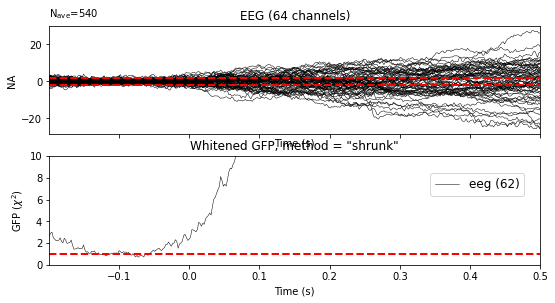

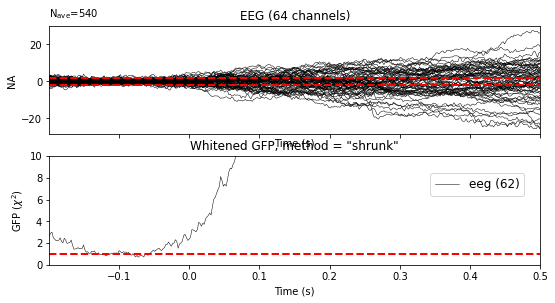

In [ ]:
evoked.plot_white(noise_cov, time_unit='s')